## Imports

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import WhitespaceTokenizer

## Loading data

In [2]:
df = pd.read_csv('./data/train.txt', delimiter = "\t", names=["class", "text"])

In [3]:
# Set this option to view the whole text in columns
pd.set_option('display.max_colwidth', None) 

In [4]:
df.head(2)

,class,text
0,0,"When the Pittsburgh Penguins had a 2-0 series lead in the Stanley Cup Finals, the only question seemed to be when, not if, the team would collect its second straight title. Now, after losing back-to-back games to the No. 8 seed Nashville Predators, the situation has gotten so dire that the Penguins may be considering hockey’s nuclear option: switching goaltenders.After Pittsburgh’s Game 4 loss on Monday, coach Mike Sullivan declined to say if Matt Murray would start between the pipes for Thursday’s Game 5. After the team gave up a combined nine goals in its two losses, some have clamored for veteran Marc-Andre Fleury to step in for the 23-year-old Murray.But such a switch would be unprecedented in recent history: No goalie has started Game 5 or later in the Finals after not having started any of the first four since at least 1990, according to Stats LLC.The only reason the Penguins are in this position is because of their absurd depth at the position. They have one of the top young talents in Murray, who leapfrogged Fleury a year ago to lead the team to the title as a rookie. And Fleury, a two-time All-Star who was in net when the team won in 2009, has already been the team’s savior this postseason, highlighted by a shutout in Game 7 of the Eastern Conference semifinals.This decision—or non-decision—is made even more difficult by the fact that their performances have been so indistinguishable this postseason. Murray, despite his recent struggles, has a .925 save percentage this postseason. That’s one thousandth of a point higher than Fleury’s .924. Murray, meanwhile, is 5-3 as a starter during the playoffs compared with Fleury’s 9-6 record.But to realize why the switch may be rash, Pittsburgh has to look no further than its opponent. Amid doubts about Pekka Rinne’s performance in net to start the series, Nashville coach Peter Laviolette made the smartest move of the series by doing absolutely nothing. Now the series is tied because of that.Not panicking over goaltenders is also one of the lessons from the most famous game in hockey history. After a 2-2 first period in the 1980 Olympic semifinals, Russia benched superstar goaltender Vladislav Tretiak. His backup gave up two goals in the third to lose the game. In Russia, it’s a haunting memory that cost the country a likely gold medal. In the U.S., it’s simply known as the Miracle on Ice.Update: On Thursday, Sullivan said Murray would start in goal in Game 5.Appeared in the June 8, 2017, print edition as 'Penguins Consider A Goalie Switch: Smart or crazy?.'"
1,0,"A basket of economic indicators rose in June for the sixth consecutive month.The Conference Board’s leading economic index rose 0.6% to 127.8 last month. Economists surveyed by The Wall Street Journal expected a 0.4% gain.Ataman Ozyildirim, director of business cycles and growth research at the Conference Board, said the sharp rise in the index pointed to continued growth in the U.S. economy and moderate improvement in GDP growth in the second half of the year.“The broad-based gain in the U.S. LEI was led by a large contribution from housing permits, which improved after several months of weakness,” Mr. Ozyildirim said.Comprised of 10 components, including initial claims for jobless benefits, factory orders and the S&P 500’s price change, the index is intended to signal swings in the business cycle and to smooth out some of the volatility of individual indicators.The board’s coincident index—designed to reflect current economic conditions and made up of four data points including nonfarm payrolls—rose 0.2% last month after climbing 0.3% in May.The index of lagging indicators rose 0.2% in June after increasing 0.1% in May.Write to Ali Stratton at ali.stratton@wsj.com"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   22000 non-null  int64 
 1   text    22000 non-null  object
dtypes: int64(1), object(1)
memory usage: 343.9+ KB


In [6]:
df['class'].value_counts() # imbalanced dataset

2    7000
3    5000
1    5000
0    5000
Name: class, dtype: int64

In [7]:
# Remove spaces from start/end of paragraphs
df['text'] = df['text'].apply(lambda x: x.strip())

In [8]:
# Find empty text rows
df.loc[df['text']=='']

,class,text
9500,2,
10131,2,
10164,2,
10230,2,
11289,2,
11313,2,
14546,2,
14549,2,
14577,2,
15417,2,


In [9]:
# Drop empty text rows
df.drop(df.loc[df['text']==''].index, inplace=True)

In [10]:
# Find duplicates
duplicates_df = df[df.duplicated()] # 1299 rows
duplicates_df

,class,text
95,2,"A court in the Caribbean island of St. Maarten has ordered Venezuelan state-run oil company PDVSA to cooperate in the sale of 500,000 barrels of crude oil in its dispute with units of Russian shipping firm Sovcomflot, according to a copy of the decision seen by Reuters on Tuesday. In March, the same court ordered the roughly $20 million in Venezuelan oil to be held until state-run Sovcomflot's claim for $30 million in unpaid shipping fees is decided in a pending action by a British admiralty court. PDVSA rejects the claim. Proceeds from the oil sale must be deposited into an escrow account at a Dutch or Antillian bank until the two sides reach a final agreement, the court said. The crude has been stored at a rented facility on the neighboring island of St. Eustatius, but Sovcomflot requested the oil be sold to a third party, arguing there was no guarantee that the crude would be insured while at the terminal. The Court of First Instance condemns PDVSA to cooperate on sale by ship owners of the cargo oil... to the best possible terms, including as high a price as possible, said the order dated July 7 and seen this week. PDVSA did not immediately respond to a request for comment. The court action suggests even political allies of Venezuela such as Russia are losing patience with PDVSA's payment delays. The Venezuelan company's obsolete tankers are struggling to export oil and supply fuel to its domestic market. The court absolved PDVSA of trial costs but said it must pay a penalty of $500,000 per day up to a maximum of $5 million if it fails to comply with the ruling. It was unclear when the penalty would begin. A PDVSA source said the company would auction the oil as soon as possible. PDVSA in October sent the cargo on tanker NS Columbus to St. Eustatius, planning to sell the crude from there. But the owner of the tanker, a unit of Russian conglomerate Sovcomflot, asked a Caribbean court to seize the oil in hopes of collecting partial payment. Five months after crossing the Caribbean, the NS Columbus discharged the crude at the Statia terminal in St. Eustatius, owned by U.S. NuStar Energy, where PDVSA rents storage tanks, under a temporary decision by the St. Maarten court. Reporting by John van Kerkhof and Marianna Parraga; editing by Gary McWilliams and Cynthia Osterman"
103,2,"A Canadian nurse who used insulin to kill eight elderly patients in long-term care facilities has been sentenced to life in prison with no chance of parole for 25 years, the Canadian Broadcasting Corp (CBC) reported on Monday. Elizabeth Wettlaufer pleaded guilty this month to killing five women and three men in the Ontario towns of Woodstock and London between 2007 and 2014. The dead ranged in age from 75 to 96. Wettlaufer then admitted in court in Woodstock, about 140 km (87 miles) west of Toronto, that she fatally injected the victims with insulin for no medical reasons. CBC reported that she apologized in court to her victims' families on Monday, although her motive remains unclear. The Ontario Ministry of the Attorney General did not immediately respond to a request for comment. Homicide cases with multiple victims are uncommon in Canada. The Wettlaufer case is the largest in Ontario province since 2006, when five men were charged with murdering eight members of a biker gang. They were convicted and sentenced to life in prison. Reporting by Ethan Lou in Calgary, Alberta; Editing by Tom Brown"
175,1,"Losses from cyber crimes rose 24 percent in 2016 to over $1.33 billion, according to a report by the Federal Bureau of Investigation's Internet Crime Complaint Center (IC3). The center, which was set up in 2000 to receive complaints of internet crime, received 300,000 complaints during the year from hacking victims. Businesses lost $360 million to cyber criminals, who tricked them into wiring money using fraudulent emails that appeared to be from corporate executives and suppliers, according to the report released on Wednesday. IC3 sai

In [11]:
# Sorting duplicate raws
pd.set_option('display.max_colwidth', 100) 

duplicates_df.sort_values('text')[:20] # more than one duplicate

,class,text
20277,1,"(FOX) (S.D.N.Y. filed July 28, 2004). The Securities and Exchange Commission (""Commission"") toda..."
4360,1,* Avanti markets data incident notification * Avanti markets says suffered a data breach through...
5152,2,"* Deutsche Bank said to face possible $60 million derivative loss- Bloomberg,citing sources Sour..."
1581,2,"* Uber faces fresh probe from U.S. FTC over its privacy practices - Recode, citing sources Sourc..."
19044,2,-2-
19649,3,2006-9-28-15-15-5-28119 The U.S. Department of the Treasury's Office of Foreign Assets Control...
20375,3,2007-2-16-12-25-42-15654 The U.S. Department of the Treasury designated three Iranian companie...
4420,2,A 24-year-old YouTube singer with a teen fan base has been charged with using social media to so...
2235,2,A 24-year-old YouTube singer with a teen fan base has been charged with using social media to so...
2782,2,A 24-year-old YouTube singer with a teen fan base has been charged with using social media to so...


In [12]:
# Drop all duplicate rows
df.drop_duplicates(inplace=True)

In [13]:
df

,class,text
0,0,"When the Pittsburgh Penguins had a 2-0 series lead in the Stanley Cup Finals, the only question ..."
1,0,A basket of economic indicators rose in June for the sixth consecutive month.The Conference Boar...
2,2,A federal judge halted late on Monday the deportation of all Iraqi nationals detained during imm...
3,0,Alexander Klimburg thinks we are not nearly as worried as we should be about internet-borne mayh...
4,0,French music and book retailer Fnac Darty said on Wednesday it had agreed to sell its Brazilian ...
...,...,...
21995,2,"99-570, 100 Stat. 3207 (ADAA) became effective on the date of the ADAA's enactment, i.e., Octobe..."
21996,2,"old Joseph Bader, who was Seth's adopted son and biological cousin. In December 1997, Joseph agr..."
21997,2,admitted to masterminding a long-standing scheme to steal advance copies of civil service ex...
21998,2,"pursuant to his pleas, of one specification of absence without leave, two specifications of disr..."


In [14]:
df['class'].value_counts() # imbalanced dataset

2    6179
3    4925
0    4836
1    4746
Name: class, dtype: int64

In [15]:
# Creating the corpus
def create_corpus(data):
    corpus = []
    doc_len_arr = []

    for doc in data:
        # Document tokenization by whitespaces
        doc_split = [token for token in WhitespaceTokenizer().tokenize(doc)]
        
        corpus.append(doc_split)
        doc_len_arr.append(len(doc_split))
        
    return corpus, doc_len_arr

In [16]:
df = df.reset_index(drop=True)

In [17]:
corpus, doc_len_arr = create_corpus(df['text'])

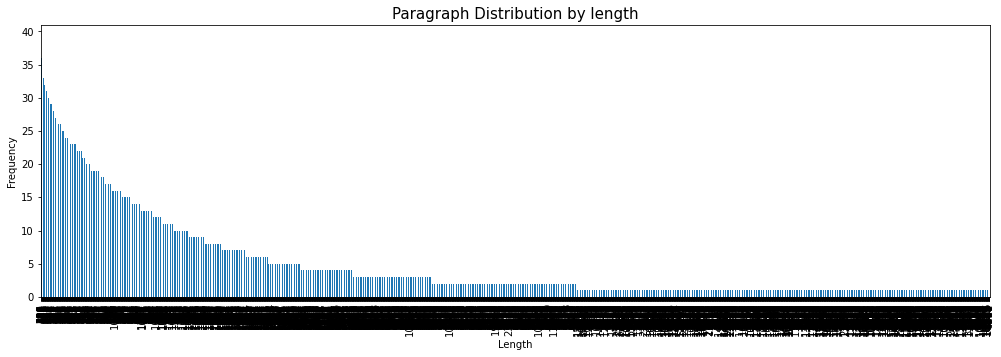

In [18]:
# Ploting the paragraph lenghts after whitespace tokenization
plt.figure(figsize=(17,5))
plt.ylabel('Frequency')
plt.xlabel('Length')
plt.title('Paragraph Distribution by length', fontsize=15)
pd.Series(doc_len_arr).value_counts().plot(kind='bar');

## Exploring paragraphs by lenghts

In [19]:
print("Max paragraph lenghts is", np.max(doc_len_arr), 'tokens')
max_par_idx = np.argmax(doc_len_arr)
df.iloc[max_par_idx]

Max paragraph lenghts is 41155 tokens


class                                                                                                      2
text     under AFCCA Rule of Practice and Procedure 18.4. MITCHELL, Chief Judge: A general court-martial ...
Name: 12534, dtype: object

In [20]:
print("Min paragraph lenghts is", np.min(doc_len_arr), 'tokens')
min_par_idx = np.argmin(doc_len_arr)
df.iloc[min_par_idx]

Min paragraph lenghts is 1 tokens


class      2
text     -2-
Name: 8173, dtype: object

In [21]:
# Converting to numpy
doc_len_arr = np.array(doc_len_arr)

In [22]:
# Paragraphs by len 0 to 7
len_0 = np.argwhere(doc_len_arr==0).flatten()
len_1 = np.argwhere(doc_len_arr==1).flatten()
len_2 = np.argwhere(doc_len_arr==2).flatten()
len_3 = np.argwhere(doc_len_arr==3).flatten()
len_4 = np.argwhere(doc_len_arr==4).flatten()
len_5 = np.argwhere(doc_len_arr==5).flatten()
len_6 = np.argwhere(doc_len_arr==6).flatten()
len_7 = np.argwhere(doc_len_arr==7).flatten()

In [23]:
df.iloc[len_0]

,class,text


In [24]:
df.iloc[len_1]

,class,text
8173,2,-2-
10251,2,2
11391,2,"""Cáceres's""."
13808,2,-3-
14027,2,Affirmed.
16320,3,TG-149
18074,3,####


In [25]:
df.iloc[len_2]

,class,text
18292,2,Affirmed. -2-


In [26]:
df.iloc[len_3]

,class,text
5084,3,Some interesting content
13559,3,Malik Ruslanovish Barkhanoev
19883,2,denied. Affirmed. -2-


In [27]:
df.iloc[len_4]

,class,text
9701,2,Clerk of the Court
10988,2,"is replaced with ""engulf""."
13083,3,Belarus Eastern Mediterranean Mali
16764,2,"Appellants, ) ) v."
20630,2,limitations is affirmed. -2-


In [28]:
df.iloc[len_5]

,class,text
5756,2,"the ground that the results."""
6027,3,Umar al-Kubaysi Al-Kawthar Money Exchange
8651,2,Affirmed. Loc. R. 27(c). -2-
18712,2,"""its EAs that are lengthy""."


In [29]:
df.iloc[len_6]

,class,text
6459,2,STEVEN LUCAS Clerk of the Court


In [30]:
df.iloc[len_7]

,class,text
10443,2,Affirmed. See 1st Cir. Loc. R. 27.1.
15402,1,"TECHNOLOGIES, INC. and C. GREGORY EARLS, No."
15460,2,"""U.S. District Judge"" and not ""Chief Judge""."
15631,2,judgment of the district court is AFFIRMED.
16058,3,North Korean Banks North Korean Financial Representatives
19992,2,") GIRDWOOD MINING COMPANY, ) ) Appellee."


In [31]:
len_1_5 = np.concatenate((len_1, len_2, len_3, len_4, len_5), axis=0)

In [32]:
len_1_5

array([ 8173, 10251, 11391, 13808, 14027, 16320, 18074, 18292,  5084,
       13559, 19883,  9701, 10988, 13083, 16764, 20630,  5756,  6027,
        8651, 18712])

In [33]:
df.drop(len_1_5, inplace=True)

In [34]:
df

,class,text
0,0,"When the Pittsburgh Penguins had a 2-0 series lead in the Stanley Cup Finals, the only question ..."
1,0,A basket of economic indicators rose in June for the sixth consecutive month.The Conference Boar...
2,2,A federal judge halted late on Monday the deportation of all Iraqi nationals detained during imm...
3,0,Alexander Klimburg thinks we are not nearly as worried as we should be about internet-borne mayh...
4,0,French music and book retailer Fnac Darty said on Wednesday it had agreed to sell its Brazilian ...
...,...,...
20681,2,"99-570, 100 Stat. 3207 (ADAA) became effective on the date of the ADAA's enactment, i.e., Octobe..."
20682,2,"old Joseph Bader, who was Seth's adopted son and biological cousin. In December 1997, Joseph agr..."
20683,2,admitted to masterminding a long-standing scheme to steal advance copies of civil service ex...
20684,2,"pursuant to his pleas, of one specification of absence without leave, two specifications of disr..."


In [35]:
df['class'].value_counts() # imbalanced dataset

2    6165
3    4919
0    4836
1    4746
Name: class, dtype: int64

In [39]:
df.to_csv('./data/train_cleaned.txt', header=None, index=None, sep=' ', mode='a', doublequote=False, escapechar=' ')